In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ignore all FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# con pandas, leer une xlsx
excel_file = pd.ExcelFile('Mental health Depression disorder Data (1).xlsx')

# Sheet prevalence-by-mental-and-substa
dfs = {}  # Diccionario para almacenar los DataFrames
for sheet_name in excel_file.sheet_names:
    dfs[sheet_name] = excel_file.parse(sheet_name)

# Sheet prevalence-of-depression-by-age
prevelance_depression_age = dfs['prevalence-of-depression-by-age']

In [3]:
prevelance_depression_age.head()

,Entity,Code,Year,20-24 years old (%),10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%)
0,Afghanistan,AFG,1990,4.417802,1.594676,3.218871,5.202803,5.799034,3.455708,5.175856,5.917752,4.071831,4.939766
1,Afghanistan,AFG,1991,4.433524,1.588356,3.203468,5.192849,5.814828,3.451880,5.176729,5.927093,4.079531,4.902682
2,Afghanistan,AFG,1992,4.453689,1.577980,3.156559,5.176872,5.829745,3.434982,5.160249,5.945656,4.088358,4.837097
3,Afghanistan,AFG,1993,4.464517,1.577201,3.120655,5.167355,5.853060,3.420210,5.148767,5.966915,4.096190,4.813657
4,Afghanistan,AFG,1994,4.462960,1.570846,3.082179,5.157549,5.852851,3.425222,5.148227,5.975907,4.099582,4.839340


In [4]:
prevelance_depression_age.isnull().sum()

Entity                    0
Code                    980
Year                      0
20-24 years old (%)       0
10-14 years old (%)       0
All ages (%)              0
70+ years old (%)         0
30-34 years old (%)       0
15-19 years old (%)       0
25-29 years old (%)       0
50-69 years old (%)       0
Age-standardized (%)      0
15-49 years old (%)       0
dtype: int64

In [5]:
prevelance_depression_age.dropna()

,Entity,Code,Year,20-24 years old (%),10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%)
0,Afghanistan,AFG,1990,4.417802,1.594676,3.218871,5.202803,5.799034,3.455708,5.175856,5.917752,4.071831,4.939766
1,Afghanistan,AFG,1991,4.433524,1.588356,3.203468,5.192849,5.814828,3.451880,5.176729,5.927093,4.079531,4.902682
2,Afghanistan,AFG,1992,4.453689,1.577980,3.156559,5.176872,5.829745,3.434982,5.160249,5.945656,4.088358,4.837097
3,Afghanistan,AFG,1993,4.464517,1.577201,3.120655,5.167355,5.853060,3.420210,5.148767,5.966915,4.096190,4.813657
4,Afghanistan,AFG,1994,4.462960,1.570846,3.082179,5.157549,5.852851,3.425222,5.148227,5.975907,4.099582,4.839340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,2.849725,1.057130,2.304587,7.443744,3.224313,2.360069,3.003961,5.680872,3.128192,3.133858
6464,Zimbabwe,ZWE,2014,2.856874,1.059057,2.326005,7.457945,3.243247,2.367584,3.019263,5.707114,3.140290,3.153508
6465,Zimbabwe,ZWE,2015,2.868684,1.062000,2.352203,7.469626,3.267892,2.375076,3.042733,5.728332,3.155710,3.179233
6466,Zimbabwe,ZWE,2016,2.893170,1.068818,2.383233,7.481952,3.295671,2.382892,3.063618,5.764120,3.174134,3.206184


In [6]:
prevelance_depression_age.dtypes

Entity                   object
Code                     object
Year                      int64
20-24 years old (%)     float64
10-14 years old (%)     float64
All ages (%)            float64
70+ years old (%)       float64
30-34 years old (%)     float64
15-19 years old (%)     float64
25-29 years old (%)     float64
50-69 years old (%)     float64
Age-standardized (%)    float64
15-49 years old (%)     float64
dtype: object

In [ ]:
from ydata_profiling import ProfileReport
profile_2 = ProfileReport(prevelance_depression_age, title='prevelance_depression_age', explorative=True)
profile_2

### Análisis de datos de depresión por nivel de educación
| Nombre de la variable                                      | Tipo de dato | Tipo de variable           |
|------------------------------------------------------------|--------------|----------------------------|
|Entity              |     object|cualitativa discreta|
|Code                |     object|cualitativa discreta|
|Year                |      int64|cuantitativa discreta|
|20-24 years old (%) |    float64|cuantitativa continua|
|10-14 years old (%) |    float64|cuantitativa continua|
|All ages (%)        |    float64|cuantitativa continua|
|70+ years old (%)   |    float64|cuantitativa continua|
|30-34 years old (%) |    float64|cuantitativa continua|
|15-19 years old (%) |    float64|cuantitativa continua|
|25-29 years old (%) |    float64|cuantitativa continua|
|50-69 years old (%) |    float64|cuantitativa continua|
|Age-standardized (%)|    float64|cuantitativa continua|
|15-49 years old (%) |    float64|cuantitativa continua|


### Análisis de variables cuantitativas

In [7]:
quantitative_columns = [
    '20-24 years old (%)',
    '10-14 years old (%)',
    'All ages (%)',
    '70+ years old (%)',
    '30-34 years old (%)',
    '15-19 years old (%)',
    '25-29 years old (%)',
    '50-69 years old (%)',
    'Age-standardized (%)',
    '15-49 years old (%)'
]

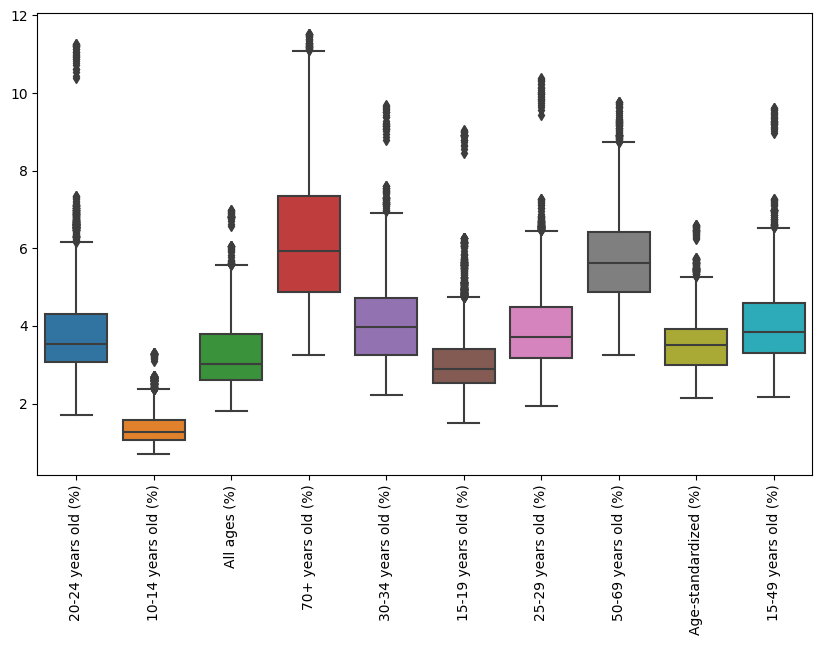

In [8]:
# generar caja de bigotes para todas las columnas cuantitativas
plt.figure(figsize=(10, 6))
sns.boxplot(data=prevelance_depression_age[quantitative_columns])
plt.xticks(rotation=90)
plt.show()

### Histogramas

Tipo de distribución: Uniforme

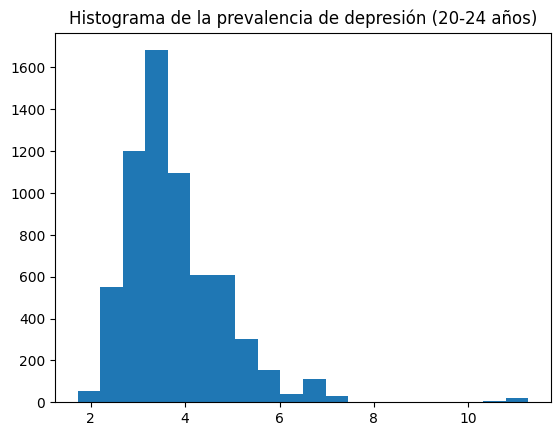

In [9]:
# Histograma para la columna '20-24 years old (%)'
plt.hist(prevelance_depression_age['20-24 years old (%)'], bins=20)
plt.title('Histograma de la prevalencia de depresión (20-24 años)')
plt.show()

Tipo de distribución: Uniforme

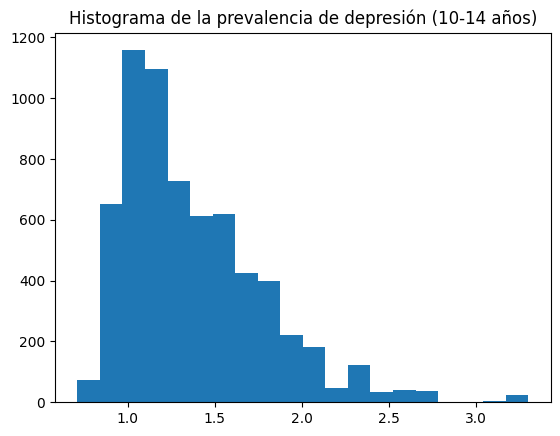

In [10]:
# Histograma para la columna '10-14 years old (%)'
plt.hist(prevelance_depression_age['10-14 years old (%)'], bins=20)
plt.title('Histograma de la prevalencia de depresión (10-14 años)')
plt.show()

Tipo de distribución: Uniforme

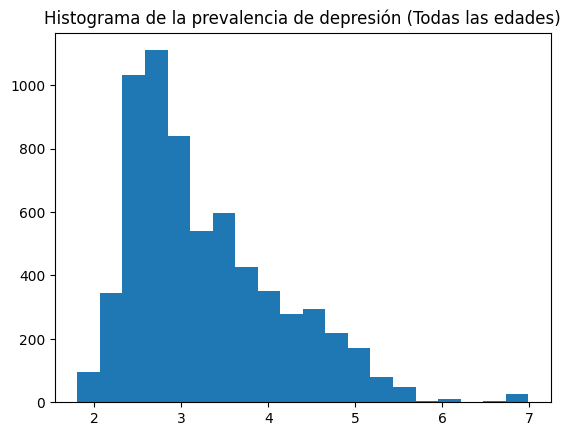

In [11]:
# Histograma para la columna 'All ages (%)'
plt.hist(prevelance_depression_age['All ages (%)'], bins=20)
plt.title('Histograma de la prevalencia de depresión (Todas las edades)')
plt.show()

Tipo de distribución: Uniforme

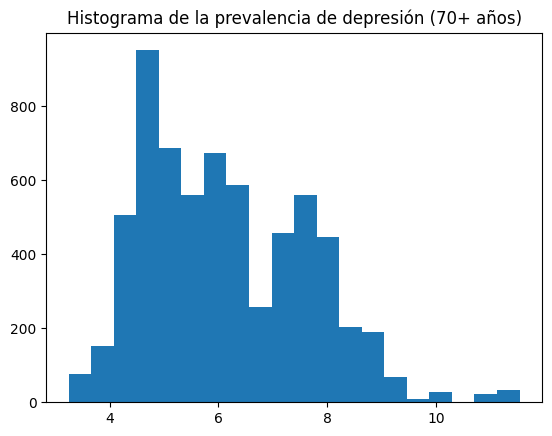

In [12]:
# Histograma para la columna '70+ years old (%)'
plt.hist(prevelance_depression_age['70+ years old (%)'], bins=20)
plt.title('Histograma de la prevalencia de depresión (70+ años)')
plt.show()

Tipo de distribución: Uniforme

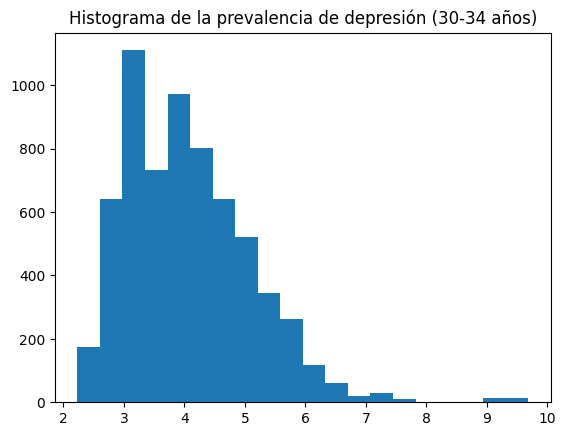

In [13]:
# Histograma para la columna '30-34 years old (%)'
plt.hist(prevelance_depression_age['30-34 years old (%)'], bins=20)
plt.title('Histograma de la prevalencia de depresión (30-34 años)')
plt.show()


Tipo de distribución: Uniforme

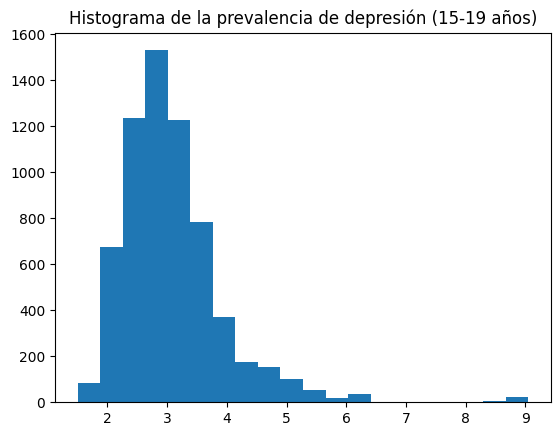

In [14]:
# Histograma para la columna '15-19 years old (%)'
plt.hist(prevelance_depression_age['15-19 years old (%)'], bins=20)
plt.title('Histograma de la prevalencia de depresión (15-19 años)')
plt.show()

Tipo de distribución: Uniforme

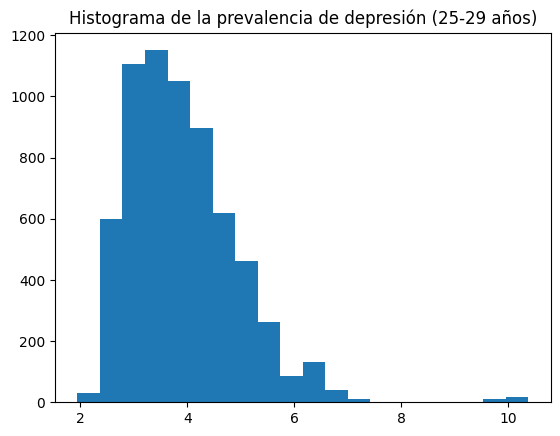

In [15]:
# Histograma para la columna '25-29 years old (%)'
plt.hist(prevelance_depression_age['25-29 years old (%)'], bins=20)
plt.title('Histograma de la prevalencia de depresión (25-29 años)')
plt.show()

Tipo de distribución: Uniforme

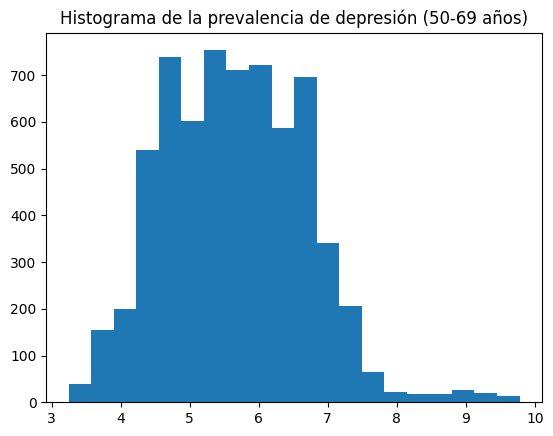

In [16]:
# Histograma para la columna '50-69 years old (%)'
plt.hist(prevelance_depression_age['50-69 years old (%)'], bins=20)
plt.title('Histograma de la prevalencia de depresión (50-69 años)')
plt.show()

Tipo de distribución: Uniforme

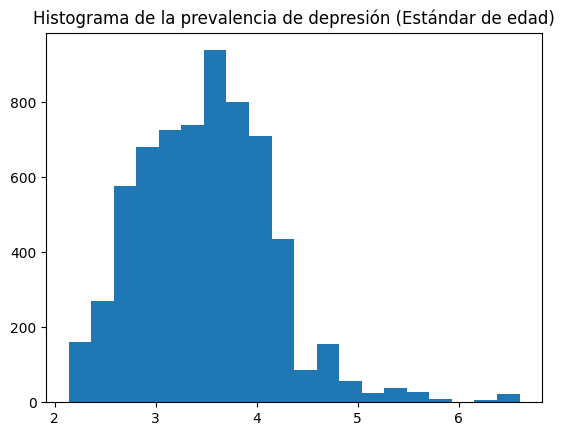

In [17]:
# Histograma para la columna 'Age-standardized (%)'
plt.hist(prevelance_depression_age['Age-standardized (%)'], bins=20)
plt.title('Histograma de la prevalencia de depresión (Estándar de edad)')
plt.show()

Tipo de distribución: Uniforme

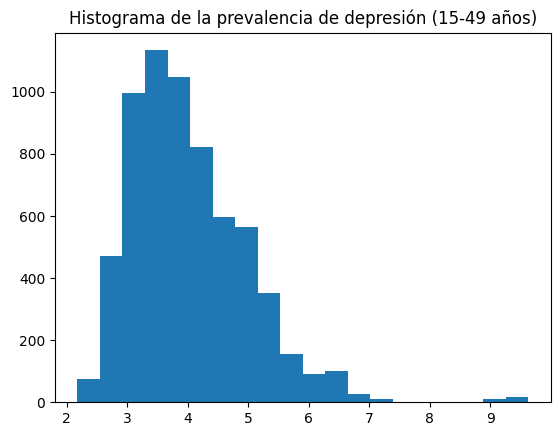

In [18]:
# Histograma para la columna '15-49 years old (%)'
plt.hist(prevelance_depression_age['15-49 years old (%)'], bins=20)
plt.title('Histograma de la prevalencia de depresión (15-49 años)')
plt.show()

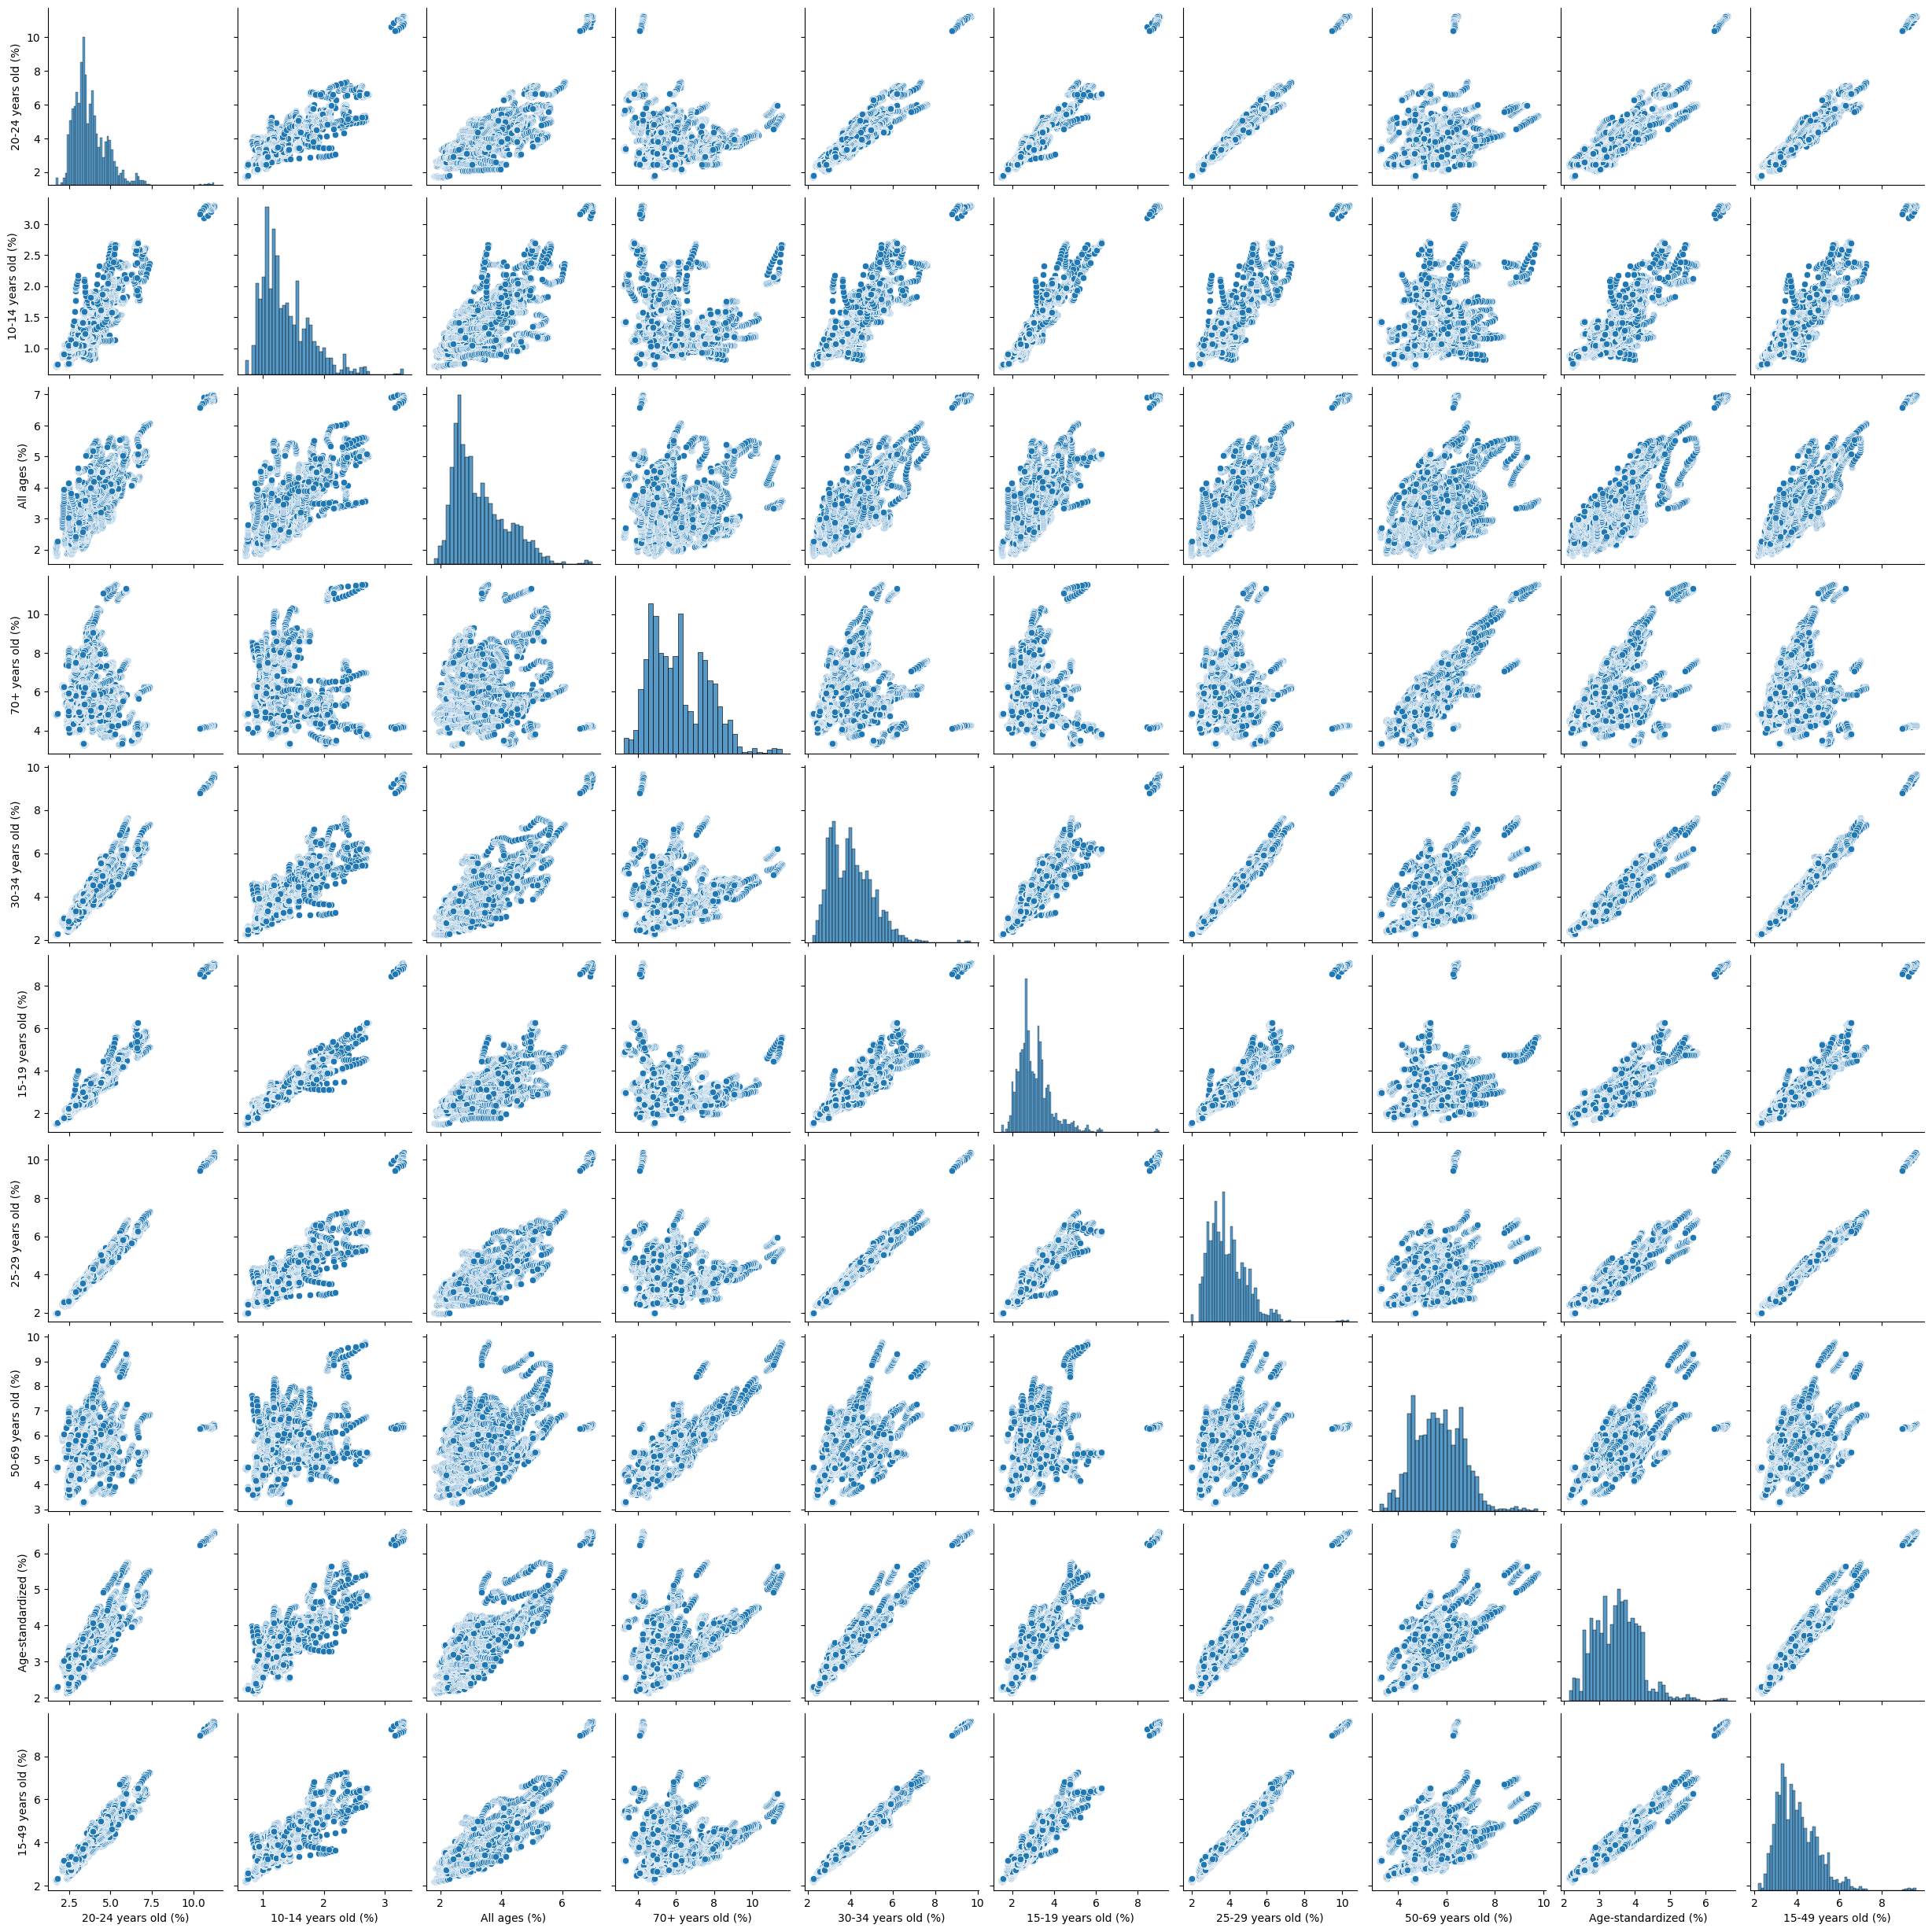

In [19]:
sns.pairplot(prevelance_depression_age[quantitative_columns])

In [20]:
correlation_matrix = prevelance_depression_age[quantitative_columns].corr()
correlation_matrix

,20-24 years old (%),10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%)
20-24 years old (%),1.000000,0.828836,0.745173,-0.101048,0.915266,0.956741,0.973710,0.222713,0.850653,0.952643
10-14 years old (%),0.828836,1.000000,0.674255,-0.155696,0.831231,0.925892,0.843803,0.172070,0.778136,0.865444
All ages (%),0.745173,0.674255,1.000000,-0.063519,0.739162,0.688857,0.760552,0.175950,0.704381,0.801840
70+ years old (%),-0.101048,-0.155696,-0.063519,1.000000,0.043083,-0.100480,-0.031576,0.872241,0.340742,0.015495
30-34 years old (%),0.915266,0.831231,0.739162,0.043083,1.000000,0.875117,0.981895,0.401658,0.937660,0.984053
15-19 years old (%),0.956741,0.925892,0.688857,-0.100480,0.875117,1.000000,0.927377,0.230829,0.837911,0.924124
25-29 years old (%),0.973710,0.843803,0.760552,-0.031576,0.981895,0.927377,1.000000,0.313568,0.910945,0.988225
50-69 years old (%),0.222713,0.172070,0.175950,0.872241,0.401658,0.230829,0.313568,1.000000,0.659674,0.376117
Age-standardized (%),0.850653,0.778136,0.704381,0.340742,0.937660,0.837911,0.910945,0.659674,1.000000,0.939855
15-49 years old (%),0.952643,0.865444,0.801840,0.015495,0.984053,0.924124,0.988225,0.376117,0.939855,1.000000


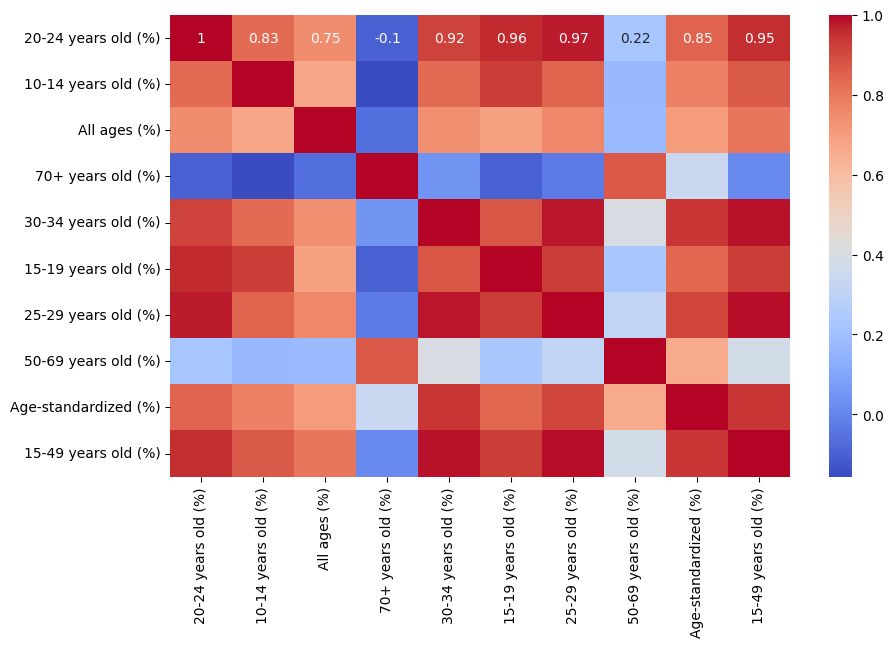

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Análisis de variables cualitativas (tablas de frecuencia)

In [26]:
#analisis variables cualitativas
qualitative_columns = ['Entity', 'Code', 'Year']


In [29]:
#analisis de la variable Entity
prevelance_depression_age['Entity'].value_counts()

Entity
Afghanistan                     28
Niger                           28
North Africa and Middle East    28
North America                   28
North Korea                     28
                                ..
Grenada                         28
Guam                            28
Guatemala                       28
Guinea                          28
Zimbabwe                        28
Name: count, Length: 231, dtype: int64

In [27]:
#analisis de la variable Code
prevelance_depression_age['Code'].value_counts()

Code
AFG    28
NZL    28
NER    28
NGA    28
PRK    28
       ..
GRC    28
GRL    28
GRD    28
GUM    28
ZWE    28
Name: count, Length: 196, dtype: int64

In [28]:
#analisis de la variable Year
prevelance_depression_age['Year'].value_counts()

Year
1990    231
1991    231
2016    231
2015    231
2014    231
2013    231
2012    231
2011    231
2010    231
2009    231
2008    231
2007    231
2006    231
2005    231
2004    231
2003    231
2002    231
2001    231
2000    231
1999    231
1998    231
1997    231
1996    231
1995    231
1994    231
1993    231
1992    231
2017    231
Name: count, dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

data_level_education = pd.get_dummies(prevelance_depression_age, columns=qualitative_columns)
data_level_education

ModuleNotFoundError: No module named 'sklearn'